## Assignment 12 _ Kiarash Gheisari Pour 402102302

this assignment is about Autoencoders and Generative AI<br>
we're gonna use the mnist the dataset for this assignment

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import tensorflow as tf
from tensorflow.keras.losses import MeanSquaredError


# Load and preprocess MNIST data
(x_train, _), (x_test, _) = mnist.load_data()

### Creating a dense autoencoder

In [ ]:
# Normalize and flatten images
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.
x_train = x_train.reshape((len(x_train), 28 * 28))
x_test = x_test.reshape((len(x_test), 28 * 28))

# Encoding dimension
encoding_dim = 64

# Input layer
input_img = Input(shape=(784,))

# Encoder (deeper)
encoded = Dense(512, activation='relu')(input_img)
encoded = Dense(256, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

# Decoder (deeper)
decoded = Dense(256, activation='relu')(encoded)
decoded = Dense(512, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

# Autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001,beta_1=0.95),
              loss=MeanSquaredError(),
             )
# Train the autoencoder
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - loss: 0.0815 - val_loss: 0.0282
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step - loss: 0.0256 - val_loss: 0.0191
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - loss: 0.0188 - val_loss: 0.0164
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - loss: 0.0166 - val_loss: 0.0151
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - loss: 0.0153 - val_loss: 0.0143


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


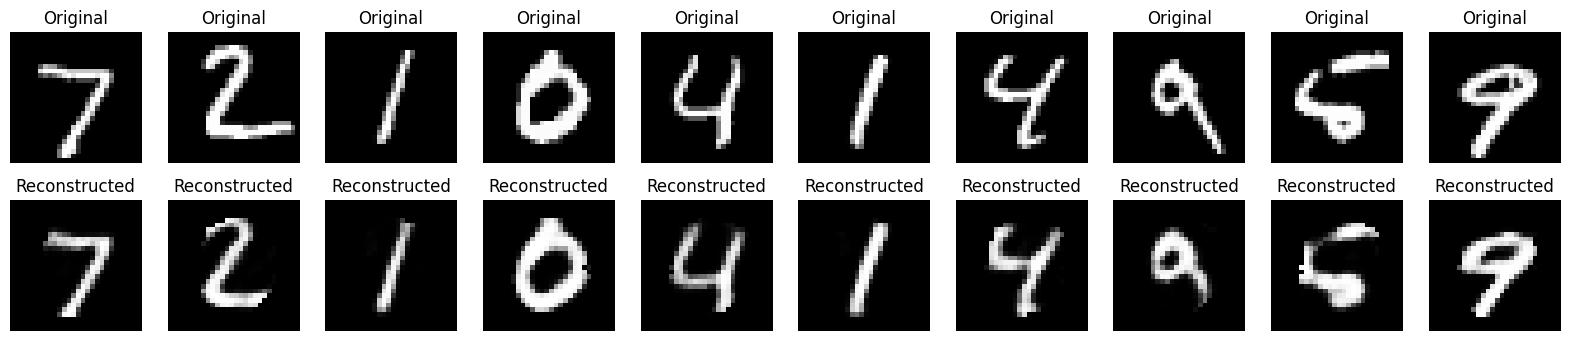

In [ ]:
# Predict on test set
decoded_imgs = autoencoder.predict(x_test)

# Display original and reconstructed images
n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()

not bad for a 'dense' AE

### Convolutional Autoencoder 

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 8)      │         2,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 32)     │         2,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,841 (22.82 KB)

 Trainable params: 5,841 (22.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 99s 204ms/step - loss: 0.2380 - val_loss: 0.0880
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 138s 197ms/step - loss: 0.0866 - val_loss: 0.0809
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 96s 204ms/step - loss: 0.0808 - val_loss: 0.0784
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 95s 202ms/step - loss: 0.0783 - val_loss: 0.0763
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 146s 211ms/step - loss: 0.0768 - val_loss: 0.0752
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 135s 196ms/step - loss: 0.0758 - val_loss: 0.0743
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 95s 204ms/step - loss: 0.0749 - val_loss: 0.0735
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 142s 203ms/step - loss: 0.0741 - val_loss: 0.0729
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 95s 203ms/step - loss: 0.0735 - val_loss: 0.0724
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 95s 203ms/step - loss: 0.0730 - val_loss: 0.0721
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 141s 202ms/step - loss: 0.0726 - val_loss: 0.0716
Epoch 12/20
46

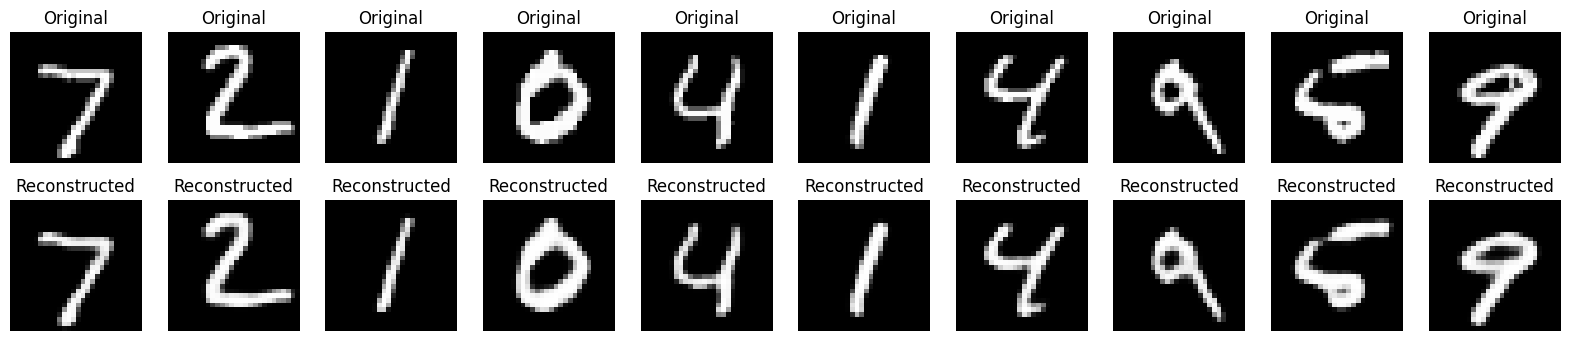

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras import backend as K

# Load and preprocess MNIST data
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # Add channel dimension
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Input shape
input_img = Input(shape=(28, 28, 1))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)  # Shape: (4, 4, 8)

# Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

# Train the autoencoder
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

# Predict on test set
decoded_imgs = autoencoder.predict(x_test)

# Display original and reconstructed images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()


much better <br>
now let's add some noise to it and train a Denoising AE!

In [ ]:
# Add random noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip to [0,1]
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [ ]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 97s 207ms/step - loss: 0.1709 - val_loss: 0.1171
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 142s 208ms/step - loss: 0.1172 - val_loss: 0.1132
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 140s 203ms/step - loss: 0.1140 - val_loss: 0.1118
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 142s 203ms/step - loss: 0.1124 - val_loss: 0.1105
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 141s 202ms/step - loss: 0.1110 - val_loss: 0.1090
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 98s 209ms/step - loss: 0.1100 - val_loss: 0.1081
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 141s 208ms/step - loss: 0.1094 - val_loss: 0.1075
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 142s 208ms/step - loss: 0.1084 - val_loss: 0.1069
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 145s 214ms/step - loss: 0.1079 - val_loss: 0.1063
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 137s 204ms/step - loss: 0.1072 - val_loss: 0.1058


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


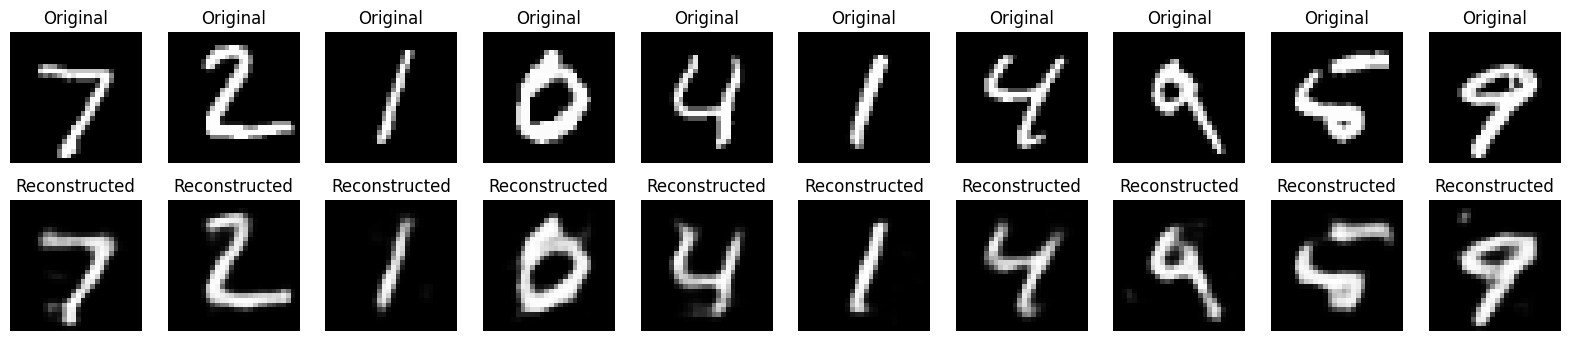

In [ ]:
decoded_imgs = autoencoder.predict(x_test_noisy)

# Display original and reconstructed images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()

As you can see we are getting much smoother results.

### GAN
let's train a GAN using the CIFAR10 data set(Airplanes only :D)

In [3]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Load CIFAR-10 and filter for 'airplane' class (label 0)
(x_train, y_train), (_, _) = tf.keras.datasets.cifar10.load_data()
airplanes = x_train[y_train.flatten() == 0]
airplanes = airplanes.astype("float32") / 127.5 - 1  # Normalize to [-1, 1]

# Constants
BUFFER_SIZE = len(airplanes)
BATCH_SIZE = 64
NOISE_DIM = 100
STEPS = 1000
SAVE_EVERY = 100

# Create Dataset
dataset = tf.data.Dataset.from_tensor_slices(airplanes).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

# Generator
def build_generator():
    model = tf.keras.Sequential([
        layers.Dense(8*8*256, use_bias=False, input_shape=(NOISE_DIM,)),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        layers.Reshape((8, 8, 256)),

        layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        layers.Conv2DTranspose(3, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'),
    ])
    return model

# Discriminator
def build_discriminator():
    model = tf.keras.Sequential([
        layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[32, 32, 3]),
        layers.LeakyReLU(),
        layers.Dropout(0.3),

        layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'),
        layers.LeakyReLU(),
        layers.Dropout(0.3),

        layers.Flatten(),
        layers.Dense(1)
    ])
    return model

# Losses and Optimizers
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    return cross_entropy(tf.ones_like(real_output), real_output) + \
           cross_entropy(tf.zeros_like(fake_output), fake_output)

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

generator = build_generator()
discriminator = build_discriminator()

gen_optimizer = tf.keras.optimizers.Adam(1e-4)
disc_optimizer = tf.keras.optimizers.Adam(1e-4)

# Training step
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, NOISE_DIM])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gen_grads = gen_tape.gradient(gen_loss, generator.trainable_variables)
    disc_grads = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    gen_optimizer.apply_gradients(zip(gen_grads, generator.trainable_variables))
    disc_optimizer.apply_gradients(zip(disc_grads, discriminator.trainable_variables))

    return gen_loss, disc_loss

# Save generated images
def generate_and_save_images(model, step, seed):
    predictions = model(seed, training=False)
    predictions = (predictions + 1) / 2.0

    fig = plt.figure(figsize=(4, 4))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i])
        plt.axis('off')
    plt.savefig(f'gan_airplanes_step_{step}.png')
    plt.close()

# Training loop
def train(dataset, steps):
    seed = tf.random.normal([16, NOISE_DIM])
    step = 0
    while step < steps:
        for image_batch in dataset:
            gen_loss, disc_loss = train_step(image_batch)
            step += 1

            if step % SAVE_EVERY == 0:
                print(f"Step {step}, Gen Loss: {gen_loss:.4f}, Disc Loss: {disc_loss:.4f}")
                generate_and_save_images(generator, step, seed)

            if step >= steps:
                break

train(dataset, STEPS)


Step 100, Gen Loss: 1.2625, Disc Loss: 0.6926
Step 200, Gen Loss: 1.7336, Disc Loss: 0.6122
Step 300, Gen Loss: 1.8462, Disc Loss: 0.8113
Step 400, Gen Loss: 1.4625, Disc Loss: 0.8550
Step 500, Gen Loss: 1.6788, Disc Loss: 0.5727
Step 600, Gen Loss: 1.7869, Disc Loss: 0.6956
Step 700, Gen Loss: 1.9075, Disc Loss: 0.4234
Step 800, Gen Loss: 1.4065, Disc Loss: 0.8665
Step 900, Gen Loss: 1.5910, Disc Loss: 0.6689
Step 1000, Gen Loss: 1.1459, Disc Loss: 1.0821


### Explain the process of adversarial learning in a few sentences.

Adversarial learning is a machine learning process where two models a generator and a discriminator are trained simultaneously in a game-like setup. The generator tries to create data that mimics real examples (e.g., images), while the discriminator tries to distinguish between real and generated (fake) data. Over time, the generator improves at producing realistic outputs that can fool the discriminator, and the discriminator becomes better at detecting fakes. This adversarial process pushes both models to improve, resulting in a generator that can produce highly realistic data.
